In [8]:
import numpy as np

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/capstone/nabil.csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the DataFrame by 'Date' in ascending order
data.sort_values(by='Date', ascending=True, inplace=True)


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:

# Inspect the first few rows of the dataset
print(data.head())


     Symbol       Date    Open    High     Low   Close Percent Change  \
2205  NABIL 2014-01-01  2210.0  2180.0  2142.0  2151.0        -2.67 %   
2204  NABIL 2014-01-02  2151.0  2150.0  2090.0  2125.0        -1.21 %   
2203  NABIL 2014-01-05  2125.0  2125.0  2100.0  2125.0         0.00 %   
2202  NABIL 2014-01-06  2125.0  2118.0  2095.0  2110.0        -0.71 %   
2201  NABIL 2014-01-07  2110.0  2135.0  2070.0  2126.0         0.76 %   

         Volume  
2205     433.00  
2204  10,110.00  
2203   5,113.00  
2202   3,381.00  
2201   4,731.00  


In [13]:
data.tail()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
4,NABIL,2023-08-24,595.0,600.0,591.1,592.5,-1.09 %,"43,106.00"
3,NABIL,2023-08-27,592.5,595.0,589.1,590.0,-0.42 %,"45,941.00"
2,NABIL,2023-08-28,596.0,596.0,590.0,590.1,0.02 %,"25,988.00"
1,NABIL,2023-08-29,592.1,596.0,588.1,590.0,-0.02 %,"29,237.00"
0,NABIL,2023-08-30,596.0,596.0,586.2,587.3,-0.46 %,"51,037.00"


In [14]:
##data cleaning

data['Percent Change'] = pd.to_numeric(data['Percent Change'].str.replace('%', '', regex=False), errors='coerce')
#Find rows with NaN values in 'Percent Change' column
rows_with_nan = data[data['Percent Change'].isna()]

# Calculate and replace NaN values with the formula=%change=(old_closng-new_closing/old_closing) mentioned
for index, row in rows_with_nan.iterrows():
    if index > 0:
        prev_row = data.loc[index - 1]
        data.at[index, 'Percent Change'] = (row['Close'] - prev_row['Close']) / row['Close']


# Clean 'Volume' column (remove commas and convert to float)
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)


In [15]:
data.isnull().sum()

Symbol            0
Date              0
Open              0
High              0
Low               0
Close             0
Percent Change    0
Volume            0
dtype: int64

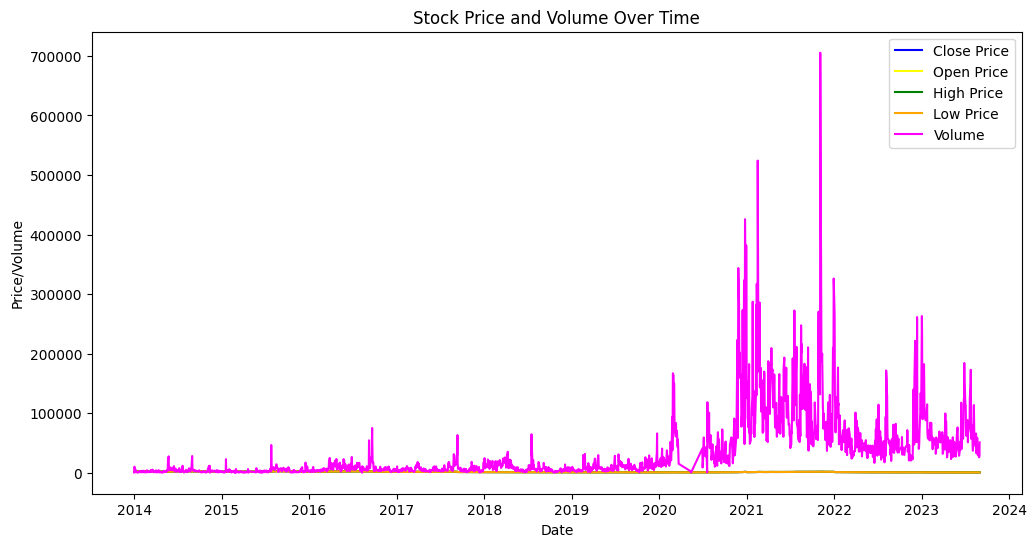

In [16]:
# Line plot of stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['Open'], label='Open Price', color='yellow')
plt.plot(data['Date'], data['High'], label='High Price', color='green')
plt.plot(data['Date'], data['Low'], label='Low Price', color='orange')
plt.plot(data['Date'], data['Volume'], label='Volume', color='magenta')
plt.xlabel('Date')
plt.ylabel('Price/Volume')
plt.title('Stock Price and Volume Over Time')
plt.legend()
plt.show()


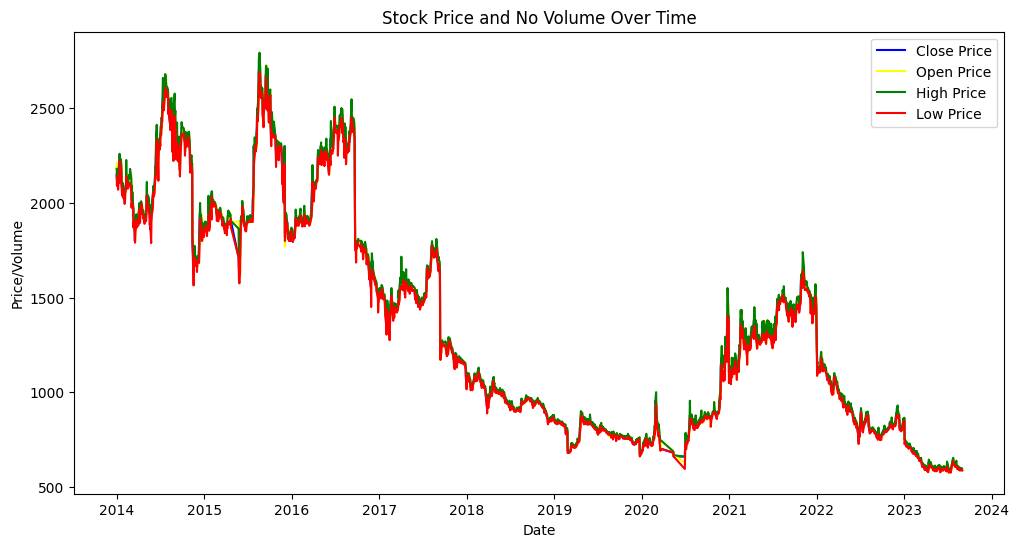

In [17]:
# Line plot of stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['Open'], label='Open Price', color='yellow')
plt.plot(data['Date'], data['High'], label='High Price', color='green')
plt.plot(data['Date'], data['Low'], label='Low Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price/Volume')
plt.title('Stock Price and No Volume Over Time')
plt.legend()
plt.show()


![image.png](attachment:7f46b6d6-67af-4244-8da7-5a61a77ec29f.png)

In [18]:
##save chart

In [19]:
##adding attributes

In [20]:
#1        #tomorrow going to raise?
#2        # nuber of holidays before today price(heiristics, sunday is usually more raise due to saturday)
#3        #technical indicators=[moving average, RSI, MACD, bollinger band, average directional index(ADX)]

# Shift the 'Close' column one row down to get tomorrow's price
data['Next_Day_Close'] = data['Close'].shift(-1)

# Create a new column 'Is_Tomorrow_High' bon
data['Is_Tomorrow_High'] = (data['Next_Day_Close'] > data['Close']).astype(int)

# Drop the 'Next_Day_Close' column if you no longer need it
data.drop('Next_Day_Close', axis=1, inplace=True)

# Display the updated DataFrame
print(data.head())


     Symbol       Date    Open    High     Low   Close  Percent Change  \
2205  NABIL 2014-01-01  2210.0  2180.0  2142.0  2151.0           -2.67   
2204  NABIL 2014-01-02  2151.0  2150.0  2090.0  2125.0           -1.21   
2203  NABIL 2014-01-05  2125.0  2125.0  2100.0  2125.0            0.00   
2202  NABIL 2014-01-06  2125.0  2118.0  2095.0  2110.0           -0.71   
2201  NABIL 2014-01-07  2110.0  2135.0  2070.0  2126.0            0.76   

       Volume  Is_Tomorrow_High  
2205    433.0                 0  
2204  10110.0                 0  
2203   5113.0                 0  
2202   3381.0                 1  
2201   4731.0                 1  


In [21]:
# Calculate the number of days between current row and previous row's date, excluding weekends
data['Days_Before_Holidays'] = (data['Date'] - data['Date'].shift(1)).dt.days-1

# Fill potential NaN values in the first row with 0
data['Days_Before_Holidays'].fillna(0, inplace=True)

# Display the updated DataFrame
print(data.head())


     Symbol       Date    Open    High     Low   Close  Percent Change  \
2205  NABIL 2014-01-01  2210.0  2180.0  2142.0  2151.0           -2.67   
2204  NABIL 2014-01-02  2151.0  2150.0  2090.0  2125.0           -1.21   
2203  NABIL 2014-01-05  2125.0  2125.0  2100.0  2125.0            0.00   
2202  NABIL 2014-01-06  2125.0  2118.0  2095.0  2110.0           -0.71   
2201  NABIL 2014-01-07  2110.0  2135.0  2070.0  2126.0            0.76   

       Volume  Is_Tomorrow_High  Days_Before_Holidays  
2205    433.0                 0                   0.0  
2204  10110.0                 0                   0.0  
2203   5113.0                 0                   2.0  
2202   3381.0                 1                   0.0  
2201   4731.0                 1                   0.0  


In [22]:
#adding technical indicators to the dataset

In [24]:
!pip install ta
!pip install xgboost

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=3540c877c53fb49f6aaf137b9882875ed6b41ea04990a3e07c01dce03ed0b3e7
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [25]:
import ta

data['Date'] = pd.to_datetime(data['Date'])

# Sort the DataFrame by date in ascending order (important for TA calculations)
data.sort_values('Date', inplace=True)



In [ ]:
data.head()

In [ ]:
df=data.copy()


In [27]:
data.set_index("Date",inplace=True)

In [30]:
# Calculate Moving Averages (e.g., 10-day and 50-day)
data['MA_10'] = ta.trend.sma_indicator(data['Close'], window=10)

# Calculate Bollinger Bands
bollinger = ta.volatility.BollingerBands(data['Close'])
data['Bollinger_Middle'] = bollinger.bollinger_mavg()
data['Bollinger_Upper'] = bollinger.bollinger_hband()
data['Bollinger_Lower'] = bollinger.bollinger_lband()

# Calculate MACD
macd = ta.trend.MACD(data['Close'])
data['MACD'] = macd.macd()
data['Signal_Line'] = macd.macd_signal()

# Calculate Average Directional Index (ADX)
data['ADX'] = ta.trend.ADXIndicator(data['High'], data['Low'], data['Close']).adx()

# Display the updated DataFrame
print(data.head(30))


           Symbol    Open    High     Low   Close  Percent Change   Volume  \
Date                                                                         
2014-01-01  NABIL  2210.0  2180.0  2142.0  2151.0           -2.67    433.0   
2014-01-02  NABIL  2151.0  2150.0  2090.0  2125.0           -1.21  10110.0   
2014-01-05  NABIL  2125.0  2125.0  2100.0  2125.0            0.00   5113.0   
2014-01-06  NABIL  2125.0  2118.0  2095.0  2110.0           -0.71   3381.0   
2014-01-07  NABIL  2110.0  2135.0  2070.0  2126.0            0.76   4731.0   
2014-01-08  NABIL  2126.0  2180.0  2100.0  2168.0            1.98   2502.0   
2014-01-09  NABIL  2168.0  2172.0  2125.0  2172.0            0.18   1115.0   
2014-01-12  NABIL  2172.0  2225.0  2105.0  2225.0            2.44   1788.0   
2014-01-13  NABIL  2225.0  2260.0  2225.0  2250.0            1.12   1385.0   
2014-01-14  NABIL  2250.0  2250.0  2220.0  2220.0           -1.33    287.0   
2014-01-16  NABIL  2220.0  2230.0  2199.0  2199.0           -0.9

/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [32]:
# Find the first non-NaN value in each column
first_non_nan = data.ffill().iloc[-1]

# Replace NaN values in columns 0 to i-1 with the first non-NaN value in the corresponding column
for col in range(data.shape[1]):
    data.iloc[:, col] = data.iloc[:, col].fillna(first_non_nan[col])


In [33]:
data.isnull().sum()

Symbol                  0
Open                    0
High                    0
Low                     0
Close                   0
Percent Change          0
Volume                  0
Is_Tomorrow_High        0
Days_Before_Holidays    0
MA_10                   0
Bollinger_Middle        0
Bollinger_Upper         0
Bollinger_Lower         0
MACD                    0
Signal_Line             0
ADX                     0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
# Define the columns for X (features) and y (target)
X_columns = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'Bollinger_Middle', 'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal_Line', 'ADX']
y_column = 'Close'

# Create X (features) and y (target)
X = data[X_columns]
y = data[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
print(f'Linear Regression RMSE: {lr_rmse}')


Linear Regression RMSE: 11.928959517699885


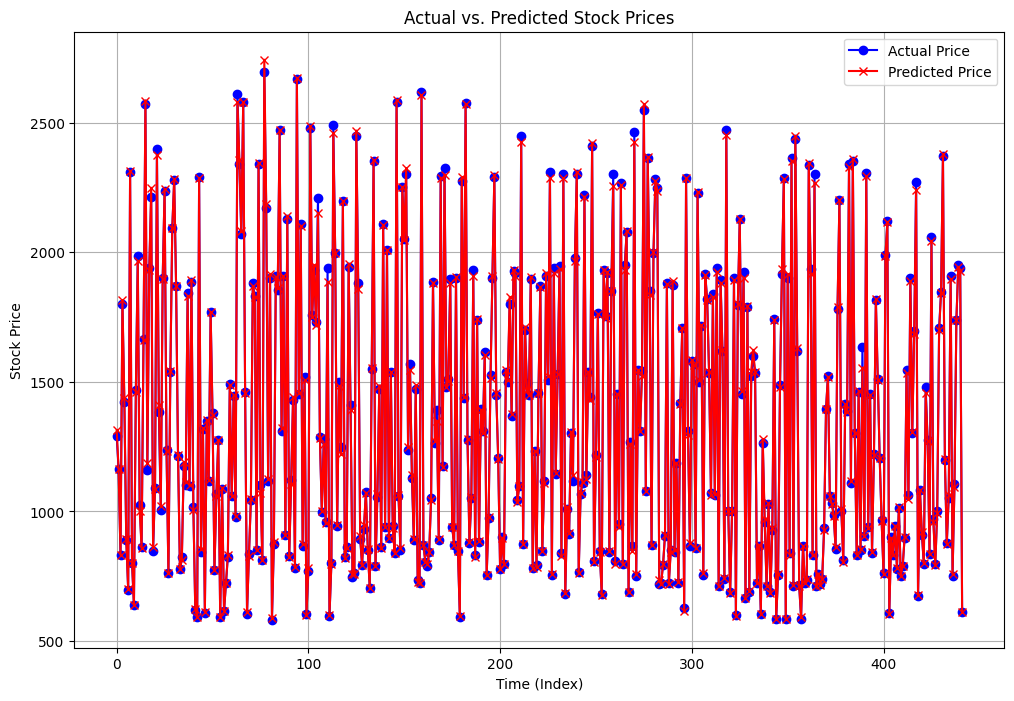

In [37]:
import matplotlib.pyplot as plt



# Create an array of numerical indices for the x-axis
x_indices = np.arange(len(y_test))

# Plot the actual vs. predicted stock prices using indices along the x-axis
plt.figure(figsize=(12, 8))
plt.plot(x_indices, y_test, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices, lr_predictions, label='Predicted Price', color='red', marker='x')
plt.xlabel('Time (Index)')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


Degree2, and Polynomial Regression RMSE: 10.87696677460234


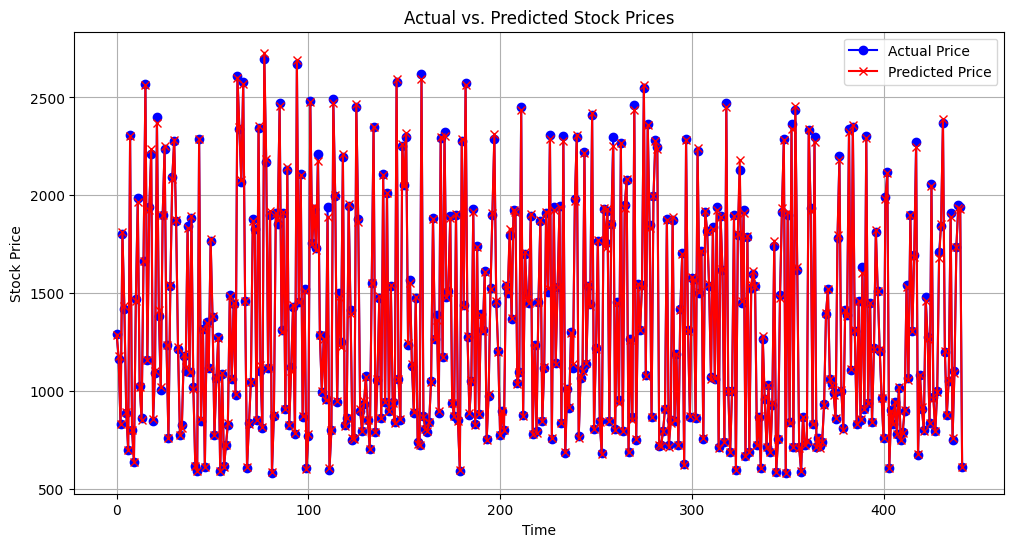

Degree3, and Polynomial Regression RMSE: 34.70564266945384


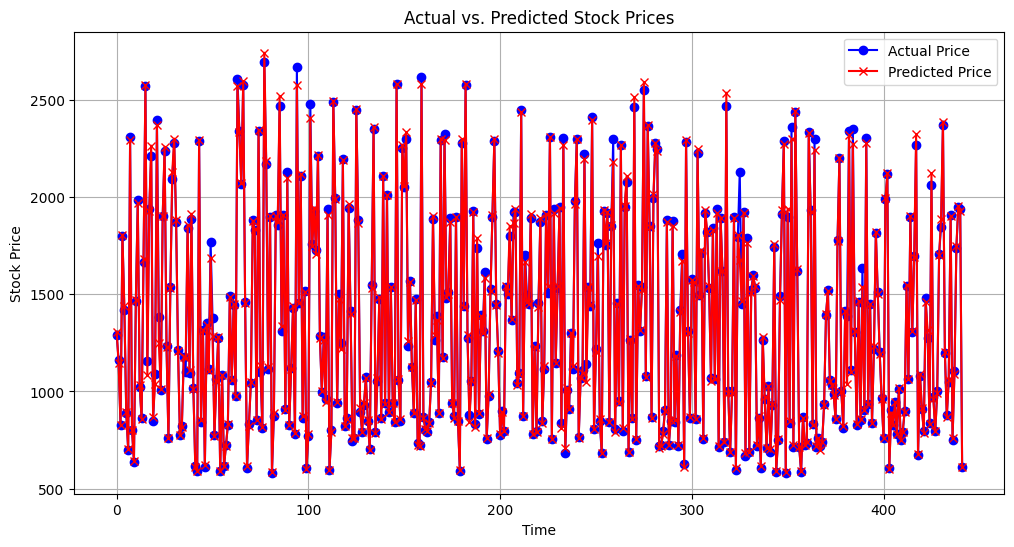

Degree4, and Polynomial Regression RMSE: 426.85920312002537


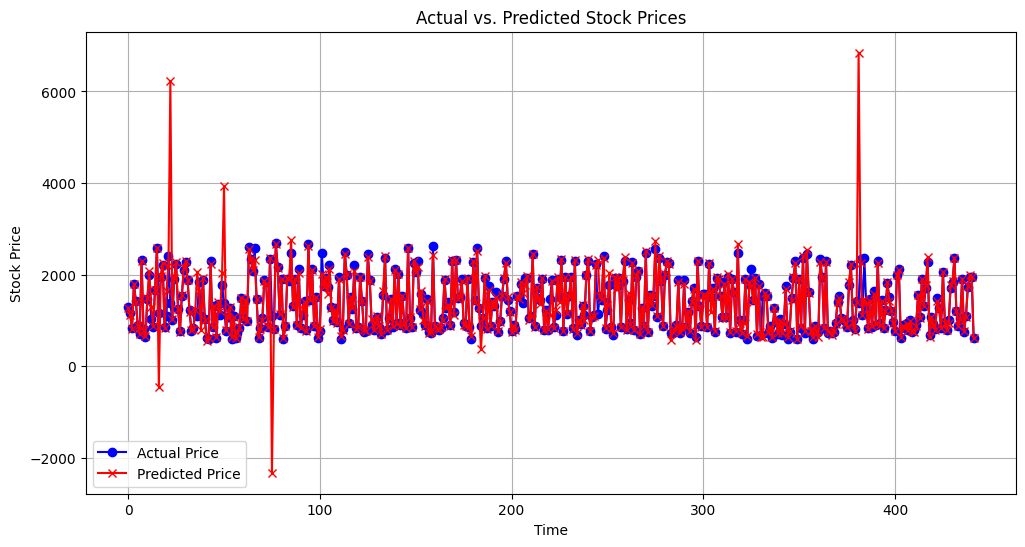

Degree5, and Polynomial Regression RMSE: 3283.409034650179


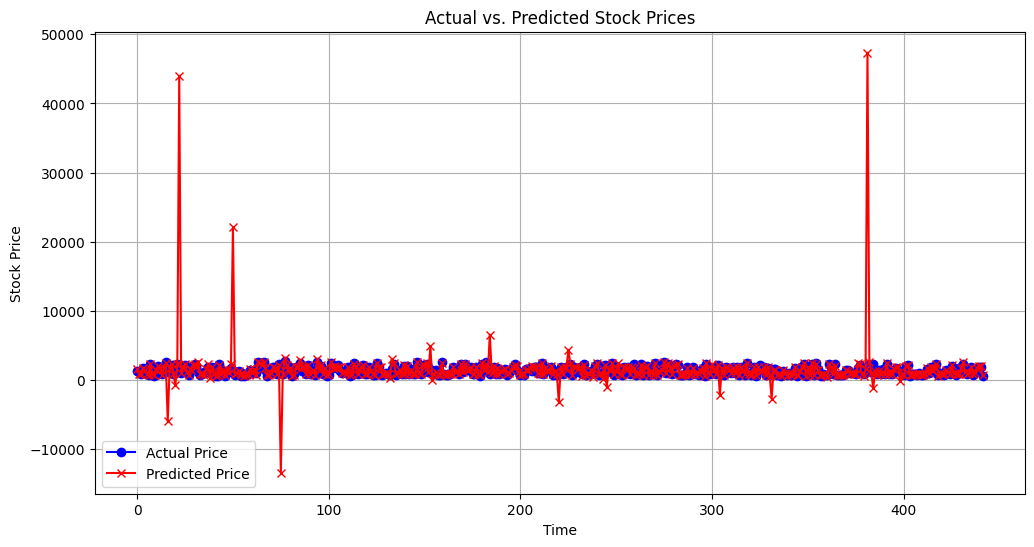

Degree6, and Polynomial Regression RMSE: 52933.393424051596


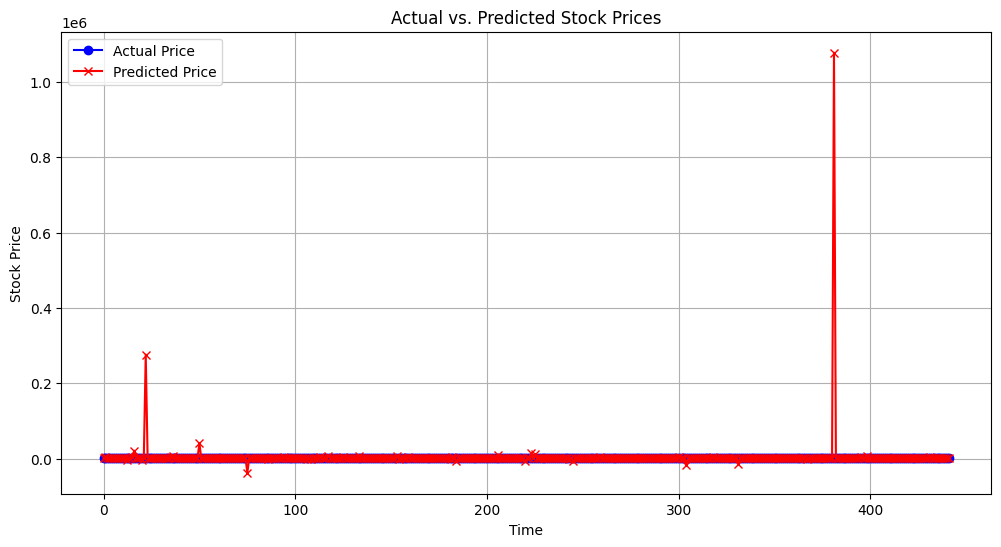

Degree7, and Polynomial Regression RMSE: 278281.3551662463


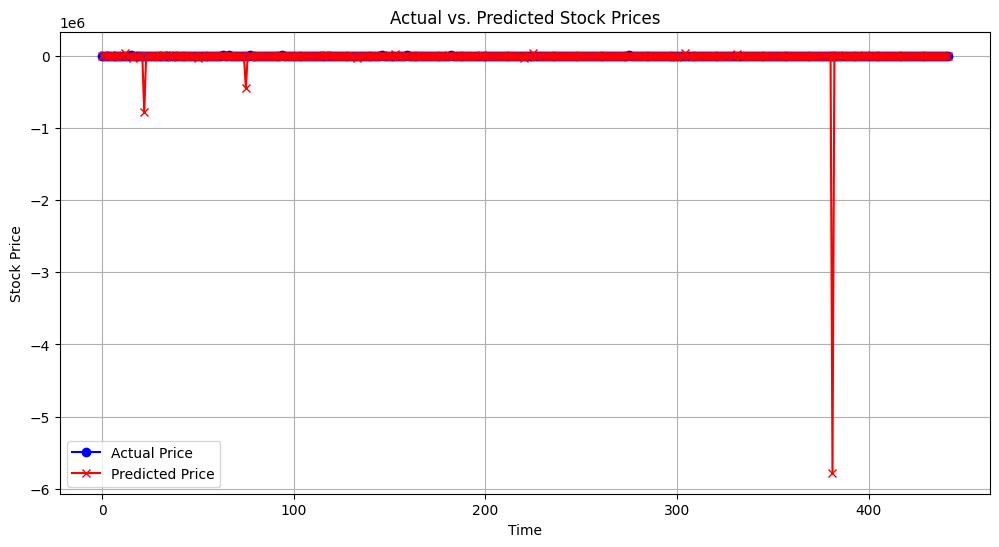

Degree8, and Polynomial Regression RMSE: 705805.133778797


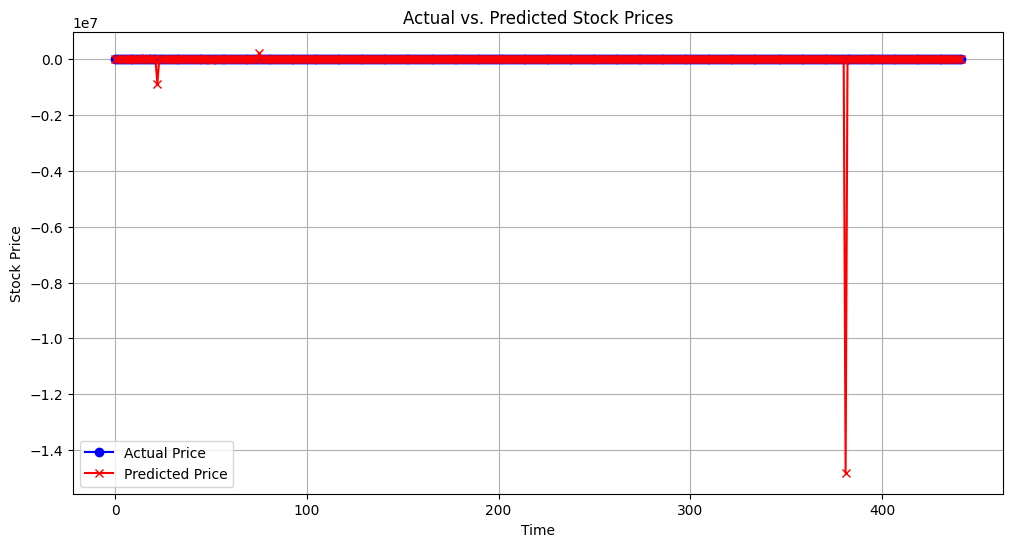

Degree9, and Polynomial Regression RMSE: 84226.58385772255


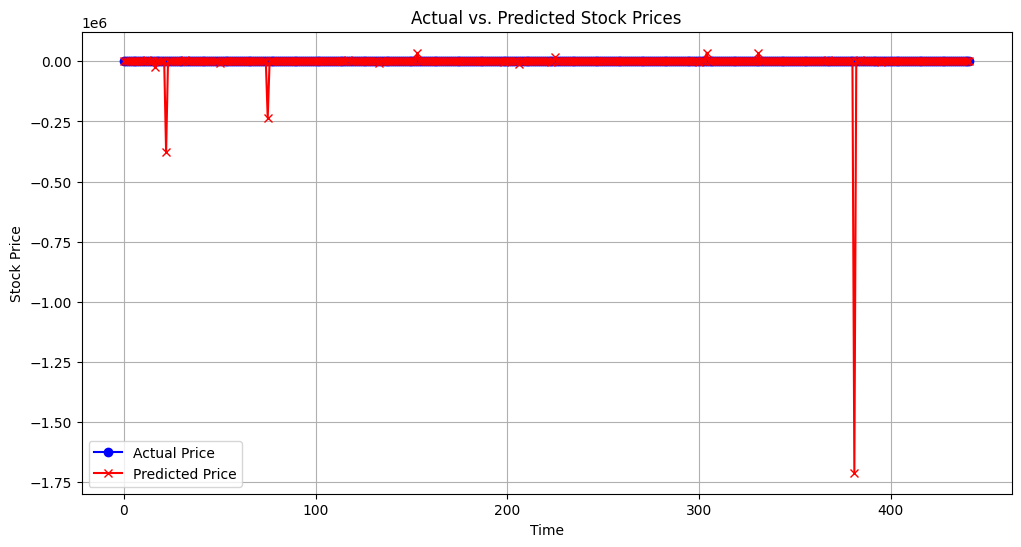

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a Polynomial Regression model
for degree in range(2,10):# = 2  # You can adjust the degree of the polynomial
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X_train, y_train)

    # Make predictions
    polyreg_predictions = polyreg.predict(X_test)

    # Evaluate the model
    polyreg_rmse = mean_squared_error(y_test, polyreg_predictions, squared=False)
    print(f'Degree{degree}, and Polynomial Regression RMSE: {polyreg_rmse}')



    # Plot the actual vs. predicted stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(x_indices,y_test, label='Actual Price', color='blue', marker='o')
    plt.plot(x_indices,polyreg_predictions, label='Predicted Price', color='red', marker='x')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Actual vs. Predicted Stock Prices')
    plt.legend()
    plt.grid(True)
    plt.show()


SVM RMSE: 675.4214808345337


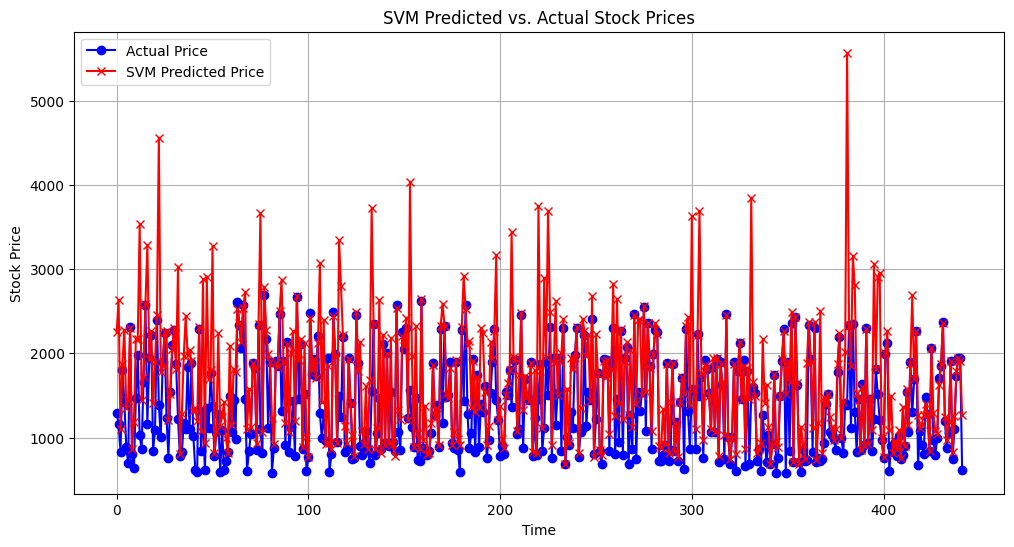

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and train an SVM regression model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
print(f'SVM RMSE: {svm_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,svm_predictions, label='SVM Predicted Price', color='red', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('SVM Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


XGBoost RMSE: 18.019176255040122


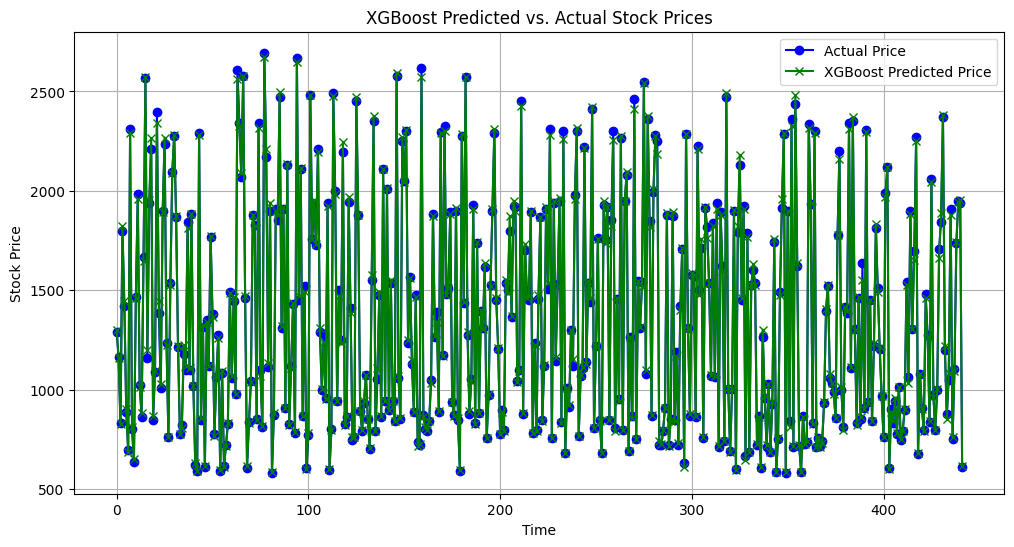

In [48]:
import xgboost as xgb

# Create and train an XGBoost regression model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print(f'XGBoost RMSE: {xgb_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,xgb_predictions, label='XGBoost Predicted Price', color='green', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('XGBoost Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


AdaBoost RMSE: 50.94843059571347


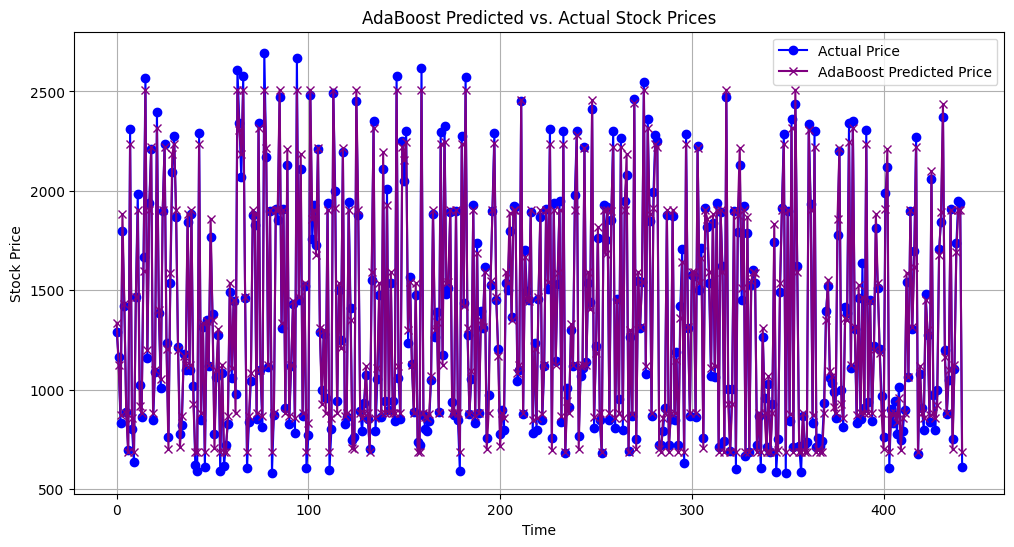

In [49]:
from sklearn.ensemble import AdaBoostRegressor

# Create and train an AdaBoost regression model
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=0.1)
adaboost_model.fit(X_train, y_train)

# Make predictions
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model
adaboost_rmse = mean_squared_error(y_test, adaboost_predictions, squared=False)
print(f'AdaBoost RMSE: {adaboost_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,adaboost_predictions, label='AdaBoost Predicted Price', color='purple', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('AdaBoost Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100
56/56 - 1s - loss: 2105461.7500 - val_loss: 2163721.2500 - 1s/epoch - 18ms/step
Epoch 2/100
56/56 - 0s - loss: 2008127.1250 - val_loss: 1908842.1250 - 138ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 1438257.6250 - val_loss: 902493.2500 - 127ms/epoch - 2ms/step
Epoch 4/100
56/56 - 0s - loss: 451685.4688 - val_loss: 264675.8125 - 133ms/epoch - 2ms/step
Epoch 5/100
56/56 - 0s - loss: 238682.1094 - val_loss: 208448.5312 - 134ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 197504.6562 - val_loss: 173035.5156 - 136ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 167093.1562 - val_loss: 145360.1094 - 174ms/epoch - 3ms/step
Epoch 8/100
56/56 - 0s - loss: 141038.6562 - val_loss: 122698.1797 - 132ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 118378.0156 - val_loss: 104375.1094 - 172ms/epoch - 3ms/step
Epoch 10/100
56/56 - 0s - loss: 98118.7500 - val_loss: 87368.2109 - 129ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 79479.5078 - val_loss: 71451.8516 - 129ms/epoc

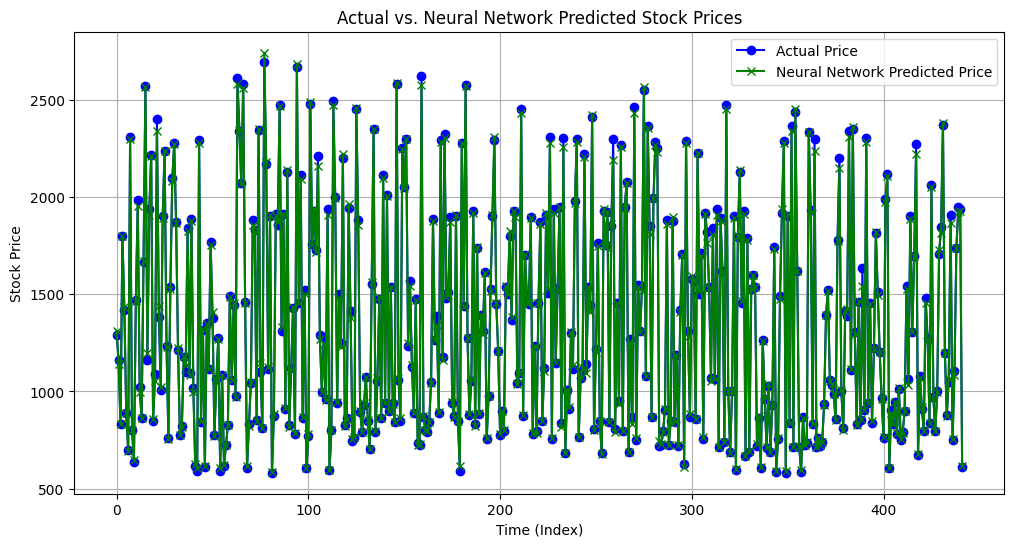

Epoch 1/100
56/56 - 1s - loss: 2071086.6250 - val_loss: 1961206.1250 - 1s/epoch - 22ms/step
Epoch 2/100
56/56 - 0s - loss: 974250.0625 - val_loss: 253445.6875 - 159ms/epoch - 3ms/step
Epoch 3/100
56/56 - 0s - loss: 194721.9844 - val_loss: 150178.3125 - 145ms/epoch - 3ms/step
Epoch 4/100
56/56 - 0s - loss: 131476.7344 - val_loss: 106224.0469 - 152ms/epoch - 3ms/step
Epoch 5/100
56/56 - 0s - loss: 90758.5859 - val_loss: 76765.2578 - 149ms/epoch - 3ms/step
Epoch 6/100
56/56 - 0s - loss: 62379.0586 - val_loss: 55645.1094 - 147ms/epoch - 3ms/step
Epoch 7/100
56/56 - 0s - loss: 45185.8281 - val_loss: 41125.2031 - 150ms/epoch - 3ms/step
Epoch 8/100
56/56 - 0s - loss: 33293.9492 - val_loss: 31142.2578 - 150ms/epoch - 3ms/step
Epoch 9/100
56/56 - 0s - loss: 25207.7969 - val_loss: 23093.5371 - 185ms/epoch - 3ms/step
Epoch 10/100
56/56 - 0s - loss: 18733.5820 - val_loss: 17921.8125 - 144ms/epoch - 3ms/step
Epoch 11/100
56/56 - 0s - loss: 14211.4180 - val_loss: 13553.4658 - 159ms/epoch - 3ms/step


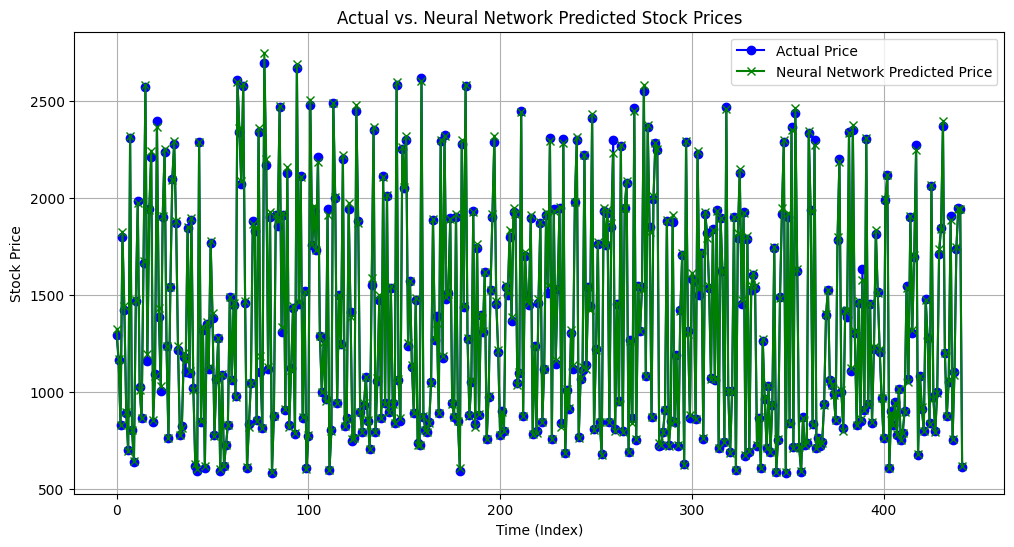

Epoch 1/100
56/56 - 1s - loss: 1928820.1250 - val_loss: 938079.6875 - 1s/epoch - 25ms/step
Epoch 2/100
56/56 - 0s - loss: 268058.4688 - val_loss: 137560.2344 - 168ms/epoch - 3ms/step
Epoch 3/100
56/56 - 0s - loss: 113545.8047 - val_loss: 85955.0781 - 209ms/epoch - 4ms/step
Epoch 4/100
56/56 - 0s - loss: 69113.6016 - val_loss: 60644.6523 - 192ms/epoch - 3ms/step
Epoch 5/100
56/56 - 0s - loss: 45764.9180 - val_loss: 39458.5195 - 171ms/epoch - 3ms/step
Epoch 6/100
56/56 - 0s - loss: 31325.0371 - val_loss: 26152.7715 - 171ms/epoch - 3ms/step
Epoch 7/100
56/56 - 0s - loss: 21083.8691 - val_loss: 17675.5664 - 221ms/epoch - 4ms/step
Epoch 8/100
56/56 - 0s - loss: 14189.6855 - val_loss: 12376.7021 - 212ms/epoch - 4ms/step
Epoch 9/100
56/56 - 0s - loss: 10564.3496 - val_loss: 8899.6406 - 213ms/epoch - 4ms/step
Epoch 10/100
56/56 - 0s - loss: 6970.8579 - val_loss: 6350.6748 - 178ms/epoch - 3ms/step
Epoch 11/100
56/56 - 0s - loss: 4981.6162 - val_loss: 4499.9863 - 174ms/epoch - 3ms/step
Epoch 12/

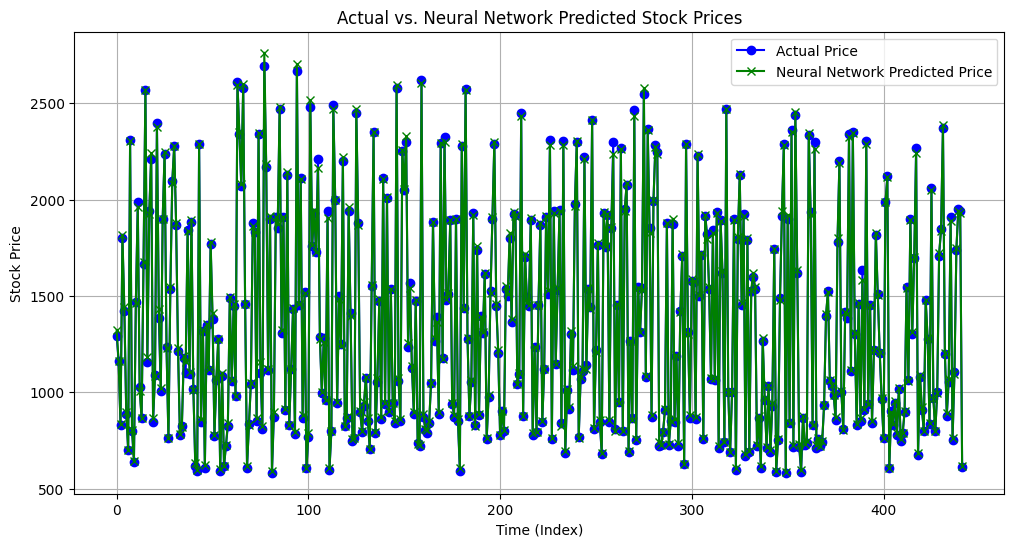

In [50]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset and preprocess it as needed
# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model with three hidden layers
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

x_indices = np.arange(len(y_test))

for model in [model1,model2,model3]:
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

    # Make predictions
    nn_predictions = model.predict(X_test)

    # Evaluate the model
    nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
    print(f'Neural Network RMSE: {nn_rmse}')

    # Plot actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(x_indices,y_test, label='Actual Price', color='blue', marker='o')
    plt.plot(x_indices,nn_predictions, label='Neural Network Predicted Price', color='green', marker='x')
    plt.xlabel('Time (Index)')
    plt.ylabel('Stock Price')
    plt.title('Actual vs. Neural Network Predicted Stock Prices')
    plt.legend()
    plt.grid(True)
    plt.show()


In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset and preprocess it as needed
# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:

# Standardize the input features (recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [53]:

# Reshape the data for the RNN (sequence_length, num_features)
sequence_length = 10  # You can adjust this window size
X_train_reshaped = np.array([X_train[i:i+sequence_length] for i in range(len(X_train) - sequence_length)])
X_test_reshaped = np.array([X_test[i:i+sequence_length] for i in range(len(X_test) - sequence_length)])
y_train_reshaped = y_train[sequence_length:]
y_test_reshaped = y_test[sequence_length:]


In [54]:

# Create an RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(sequence_length, X_train.shape[1])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test_reshaped), verbose=2)


Epoch 1/100
55/55 - 2s - loss: 1340266.0000 - val_loss: 503786.1875 - 2s/epoch - 31ms/step
Epoch 2/100
55/55 - 0s - loss: 425121.5312 - val_loss: 405898.2812 - 278ms/epoch - 5ms/step
Epoch 3/100
55/55 - 0s - loss: 395742.9375 - val_loss: 402222.9688 - 259ms/epoch - 5ms/step
Epoch 4/100
55/55 - 0s - loss: 391657.1875 - val_loss: 384008.9688 - 376ms/epoch - 7ms/step
Epoch 5/100
55/55 - 0s - loss: 377535.4062 - val_loss: 410505.4375 - 366ms/epoch - 7ms/step
Epoch 6/100
55/55 - 0s - loss: 380510.1875 - val_loss: 365515.0312 - 394ms/epoch - 7ms/step
Epoch 7/100
55/55 - 0s - loss: 368254.6250 - val_loss: 383033.2812 - 374ms/epoch - 7ms/step
Epoch 8/100
55/55 - 0s - loss: 359669.0938 - val_loss: 357323.0312 - 362ms/epoch - 7ms/step
Epoch 9/100
55/55 - 0s - loss: 357103.8438 - val_loss: 355102.2500 - 426ms/epoch - 8ms/step
Epoch 10/100
55/55 - 0s - loss: 354432.9062 - val_loss: 353377.2500 - 370ms/epoch - 7ms/step
Epoch 11/100
55/55 - 0s - loss: 356634.0625 - val_loss: 346744.4688 - 372ms/epoc

In [55]:

# Make predictions
rnn_predictions = model.predict(X_test_reshaped)

# Evaluate the model
rnn_rmse = np.sqrt(mean_squared_error(y_test_reshaped, rnn_predictions))
print(f'RNN RMSE: {rnn_rmse}')


14/14 [==============================] - 0s 2ms/step
RNN RMSE: 657.8435013410448


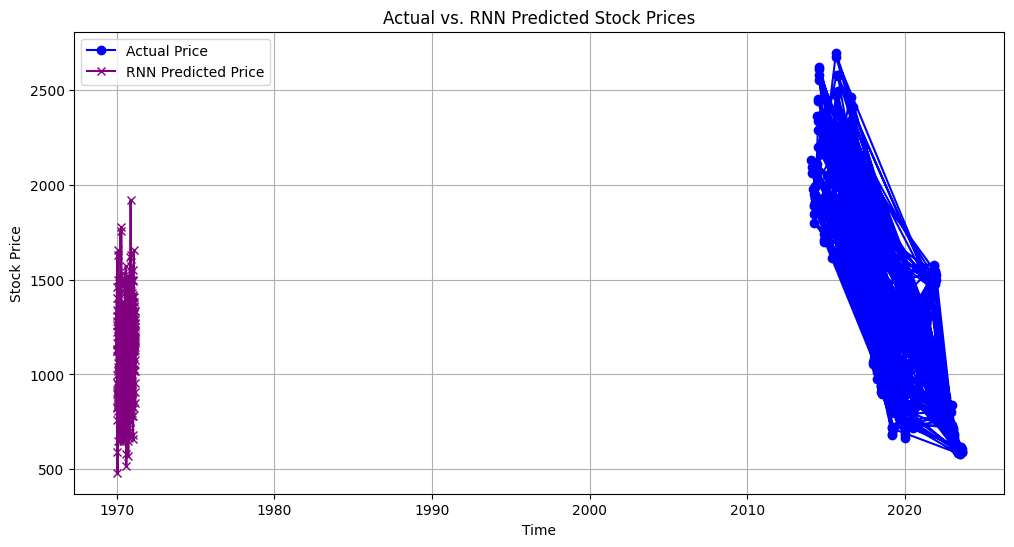

In [56]:

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_reshaped, label='Actual Price', color='blue', marker='o')
plt.plot(rnn_predictions, label='RNN Predicted Price', color='purple', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. RNN Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#final thing
for model in models:
  #train

  #test

  #plot losses over the time

  #use mode to predict all prices(from start to now)

  #plot two graphs showing actual prics vs what model has learned